In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import regex

In [2]:
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer

In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arthurspriet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/arthurspriet/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
names = []
base = '/Users/arthurspriet/Desktop/Data'
with os.scandir(base) as entries:
    for entry in entries:
        if(entry.is_file() == False):
            names.append(entry.name)
names

['Entertainment', 'Science', 'Politics', 'Crime']

In [6]:
names.sort()

In [7]:
files = {}
unique = []
for name in names:
    path = base +'/'+ name +'/'
    x = []
    with os.scandir(path) as entries:
        for entry in entries:
            if(entry.is_file()):
                x.append(entry.name)
    files[name] = x
    files[name].sort()

In [8]:
for k, v in files.items():
    print(k, len(v))

Crime 1100
Entertainment 1053
Politics 3001
Science 4000


In [9]:
for i in range(len(names)):
    x = files[names[i]]
    for j in x:
        for k in range(i+1, len(names)):
            key = names[k]
            if j in files[key]:
                files[key].remove(j)

In [10]:
data = {}
i = 0

for genre in files.keys() :
    texts = files[genre]
    for text in texts:
        if text in files[genre]:
            path = base + '/'+ genre + '/' + text
            with open(path, "r", encoding = "latin1") as file:
                data[i] = file.readlines()
                i = i+1
            data[i-1] = [" ".join(data[i-1]), genre] 

data = pd.DataFrame(data).T
print(data.shape)
data.columns = ['Text', 'Class']
data.head()

(6734, 2)


,Text,Class
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime
4,\n Some sick part of me really liked that p...,Crime


In [11]:
dic = dict(data)

In [12]:
uni = {}
i = 0
for k in range(len(list(dic['Text']))):
    if dic['Text'][k] in unique:
        uni[i] = [dic['Text'][k], dic['Class'][k]]
        unique.remove(dic['Text'][k])
        i += 1

In [13]:
for k, v in files.items():
    print(k, len(v))

Crime 1100
Entertainment 0
Politics 3001
Science 2633


/opt/homebrew/Caskroom/miniforge/base/envs/payet/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


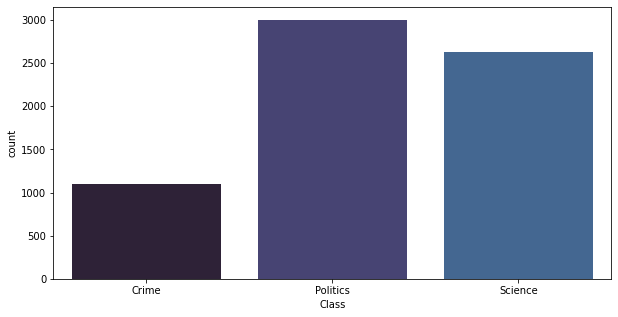

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data.Class, palette = sns.color_palette("mako"))

In [15]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha() and len(w) > 3]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

In [16]:
data["filtered_text"] = data.Text.apply(lambda x : filter_text(x, stop)) 
data.head()

,Text,Class,filtered_text
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime,archive name ripem last update post still rath...
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,approve news answer request content type text ...
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,approve news answer request content type text ...
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime,message bilbo suite reply miller suite nntp po...
4,\n Some sick part of me really liked that p...,Crime,sick part really like phrase actually merely t...


<AxesSubplot:ylabel='words'>

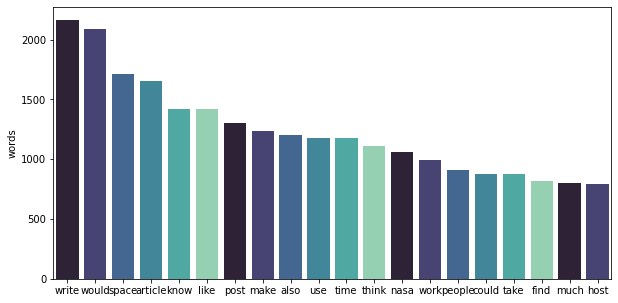

In [18]:
all_text = " ".join(data[data.Class == "Science"].filtered_text)
science = pd.DataFrame(all_text.split(), columns = ['words'])
top_science = science[science['words'].isin(list(science.words.value_counts()[:20].index[:20]))]
plt.figure(figsize=(10,5))
sns.barplot(x = top_science.words.value_counts().index,
            y = top_science.words.value_counts(), palette = sns.color_palette("mako"))

<AxesSubplot:ylabel='words'>

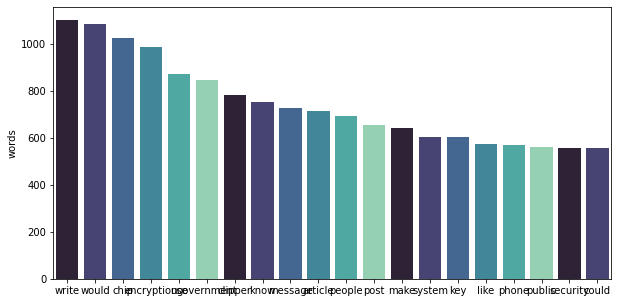

In [19]:
all_text = " ".join(data[data.Class == "Crime"].filtered_text)
crime = pd.DataFrame(all_text.split(), columns = ['words'])
top_crime = crime[crime['words'].isin(list(crime.words.value_counts()[:20].index[:20]))]
plt.figure(figsize=(10,5))
sns.barplot(x = top_crime.words.value_counts().index,
            y = top_crime.words.value_counts(), palette = sns.color_palette("mako"))

<AxesSubplot:ylabel='words'>

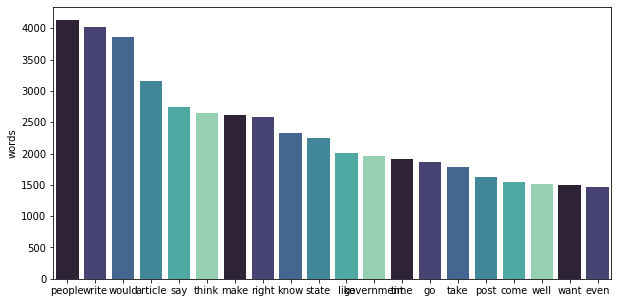

In [20]:
all_text = " ".join(data[data.Class == "Politics"].filtered_text)
politics = pd.DataFrame(all_text.split(), columns = ['words'])
top_politics = politics[politics['words'].isin(list(politics.words.value_counts()[:20].index[:20]))]
plt.figure(figsize=(10,5))
sns.barplot(x = top_politics.words.value_counts().index,
            y = top_politics.words.value_counts(), palette = sns.color_palette("mako"))

In [21]:
politics['count'] =''
count_politics = politics.groupby('words').count().reset_index()
count_politics['Class'] = 'politics'

In [22]:
science['count'] =''
count_science = science.groupby('words').count().reset_index()

In [23]:
count_science['Class'] ='science'
count_science

,words,count,Class
0,aaaaa,1,science
1,aaahh,1,science
2,aaai,3,science
3,aacs,1,science
4,aagain,1,science
...,...,...,...
24243,zware,1,science
24244,zwarte,2,science
24245,zwork,3,science
24246,zygon,2,science


In [24]:
crime['count'] =''
count_crime = crime.groupby('words').count().reset_index()
count_crime['Class'] ='crime'
count_crime

,words,count,Class
0,aaack,1,crime
1,aachen,3,crime
2,aarhus,3,crime
3,aarnet,1,crime
4,abandon,2,crime
...,...,...,...
12405,zzcrm,1,crime
12406,çait,1,crime
12407,égligent,1,crime
12408,élangea,1,crime


In [25]:
count_science

,words,count,Class
0,aaaaa,1,science
1,aaahh,1,science
2,aaai,3,science
3,aacs,1,science
4,aagain,1,science
...,...,...,...
24243,zware,1,science
24244,zwarte,2,science
24245,zwork,3,science
24246,zygon,2,science


In [26]:
df_final = pd.concat([count_science, count_politics, count_crime])

In [27]:
df_final.sample(20)

,words,count,Class
10998,ideas,113,politics
8371,fiasco,8,politics
13489,linkages,1,politics
10237,iiiii,2,science
5857,delight,12,politics
10200,sneak,5,crime
9126,guadeloupe,1,science
17175,perspectives,2,politics
8448,popularity,1,crime
8864,frequently,46,politics


In [28]:
df_pivot = pd.pivot_table(df_final, values='count', index='words', columns='Class',
                          aggfunc='sum')

In [29]:
df_pivot = df_pivot.reset_index()

In [30]:
df_pivot = df_pivot.dropna()

In [31]:
df_pivot['Sum'] = df_pivot['crime'] + df_pivot['politics'] + df_pivot['science']

In [32]:
df_pivot = df_pivot.sort_values("Sum", ascending=False)
df_pivot

Class,words,crime,politics,science,Sum
42496,write,1102.0,4016.0,2164.0,7282.0
42451,would,1086.0,3862.0,2092.0,7040.0
28546,people,695.0,4132.0,908.0,5735.0
2397,article,714.0,3161.0,1653.0,5528.0
21140,know,754.0,2334.0,1419.0,4507.0
...,...,...,...,...,...
41498,wad,1.0,1.0,1.0,3.0
22283,linkage,1.0,1.0,1.0,3.0
9270,daunt,1.0,1.0,1.0,3.0
26784,nyquist,1.0,1.0,1.0,3.0


In [33]:
df_pivot.drop('Sum', axis=1, inplace=True)

In [34]:
df_pivot

Class,words,crime,politics,science
42496,write,1102.0,4016.0,2164.0
42451,would,1086.0,3862.0,2092.0
28546,people,695.0,4132.0,908.0
2397,article,714.0,3161.0,1653.0
21140,know,754.0,2334.0,1419.0
...,...,...,...,...
41498,wad,1.0,1.0,1.0
22283,linkage,1.0,1.0,1.0
9270,daunt,1.0,1.0,1.0
26784,nyquist,1.0,1.0,1.0


In [38]:
plt.rcParams["figure.figsize"] = [200, 100]
plt.rcParams.update({'font.size': 60})
df_pivot[:150].plot.bar(x='words', stacked=True, title='Number of words')

<AxesSubplot:title={'center':'Number of words'}, xlabel='words'>